Taken in part from the course [Creative applications of deep learning with tensorflow](https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-i)

- [Regression to a noisy sine wave](#regression-1d)
    - [L1 minimization with SGD](#L1-SGD)
    - [Linear regression iterations](#regression-1d-sine)
    - [Regression by a cubic polynomial](#cubic-regression)
    - [Non linear activation](#non-linear-activation)
    - [Simple network with a non linear activation](#net-with-non-linear-activation)
    - [Going deeper](#going-deeper)

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

<a name="regression-1d"></a>
# Regression to a sine wave

### Creating the dataset

In [2]:
#---------------------------------------------
# Create the data set: Sine wave with noise
#--------------------------------------------
n_observations = 1000
xs             = np.linspace(-3, 3, n_observations)
ys             = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
#plt.scatter(xs, ys, alpha=0.15, marker='+')


<a name="L1-SGD"></a>
### The training procedure: L1 minimization with batch stochadtic GD

In [3]:
# L1 cost function
def distance(p1, p2):
    return tf.abs(p1 - p2)

def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost      = tf.reduce_mean(distance(Y_pred, Y))  # cost ==> mean L1 distance for alls samples
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


    # Plot the true data distribution
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set `W` and `b` to their initial random normal value.
        sess.run(tf.initialize_all_variables())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / float(n_iterations))
                
                # getting the values as numpy array
                #    w =  sess.run(W, feed_dict={X: xs, Y: ys})
                #    b =  sess.run(B, feed_dict={X: xs, Y: ys})
                print ' iteration: {:3} Cost: {} '.format(it_i,training_cost)
                                                                       
                                                                        

    fig.show()
    plt.draw()
    



<a name="regression-1d-sine"></a>
### Linear regression

 iteration:   0 Cost: 1.02243745327 
 iteration:  10 Cost: 0.676981925964 
 iteration:  20 Cost: 0.479605644941 
 iteration:  30 Cost: 0.427596181631 
 iteration:  40 Cost: 0.414617389441 
 iteration:  50 Cost: 0.410947740078 
 iteration:  60 Cost: 0.410117208958 
 iteration:  70 Cost: 0.40997043252 
 iteration:  80 Cost: 0.409941107035 
 iteration:  90 Cost: 0.40993231535 


/home/shmuel/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


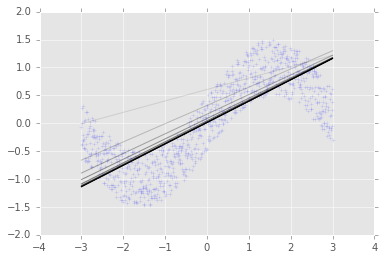

In [4]:
# Reset default graph
tf.reset_default_graph()

# Declare variables 
# placeholders to hold input data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Variables for internal weights
W         = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B         = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')
Y_pred    = X * W + B

train(X,Y,Y_pred)

<a name="cubic-regression"></a>
### Cubic polynomial regression

 iteration:   0 Cost: 1.03337597847 
 iteration:  10 Cost: 0.503705084324 
 iteration:  20 Cost: 0.405008226633 
 iteration:  30 Cost: 0.295544326305 
 iteration:  40 Cost: 0.278240144253 
 iteration:  50 Cost: 0.28860899806 
 iteration:  60 Cost: 0.261719107628 
 iteration:  70 Cost: 0.283545523882 
 iteration:  80 Cost: 0.266137629747 
 iteration:  90 Cost: 0.311225652695 


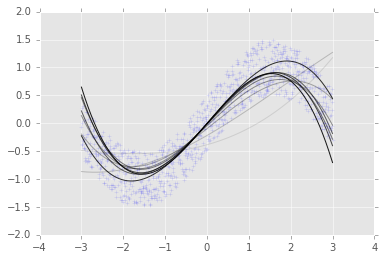

In [5]:
# Reset default graph
tf.reset_default_graph()

# Declare variables 
# placeholders to hold input data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Variables for internal weights
B         = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')
Y_pred    = tf.Variable(tf.random_normal([1]), name='bias')

for pow_i in range(0, 4):
    # Instantiate weight for each monomial
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)


train(X,Y,Y_pred)

<a name="non-linear-activation"></a> 
## Non linear activation

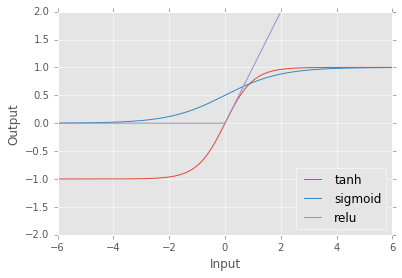

In [6]:
# Reset default graph
tf.reset_default_graph()

sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

<a name="net-with-non-linear-activation"></a> 
## Simple network with tanh non linear activation

 iteration:   0 Cost: 0.303072452545 
 iteration:  10 Cost: 0.274794787169 
 iteration:  20 Cost: 0.2725712955 
 iteration:  30 Cost: 0.27083954215 
 iteration:  40 Cost: 0.269666045904 
 iteration:  50 Cost: 0.268798857927 
 iteration:  60 Cost: 0.268146961927 
 iteration:  70 Cost: 0.267559617758 
 iteration:  80 Cost: 0.266988933086 
 iteration:  90 Cost: 0.266578555107 


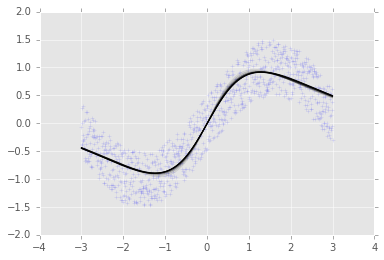

In [7]:
X         = tf.placeholder(tf.float32, name='X')
Y         = tf.placeholder(tf.float32, name='Y')     

#---------------------------------------------------------------------------
# Create inner layer of 10 neurons followed by non-linear activation
#  W  : 1 x n_neurons         martix
#  b  : n_neurons             vector
#
#  X  : n_vals                Input vector of values
#  Y  : n_vals                Input noisy values of sin(X)
#
# For a single input value x_i we do:
#      h_k(x_i)= h(x_i * w_k + b_k) , k=1,...,n_neuorns
# In vector notations
#  (1)    h       = x_i * W + b
# where h is the non-linear activation function.
#  (2)   y_pred_i = h_1 + h_2  + .... + h_n_neurons
#
# From single input/output value to a vector
# -------------------------------------------
# Consider now a vector of input valuse: X = (x_1,...,x_n_vals)^T
# Let us expand this vector to a column matrix XM = f.expand_dims(X, 1)
# Then,instead of the single vector in (1) we have a matrix of n_vals x n_neurons entries
#       H = matmul(XM,W) 
# which we sum, row by row, as in (2) to get the prediction vector Y_PRED
#---------------------------------------------------------------------------
n_neurons = 10
W         = tf.Variable(tf.random_normal([1, n_neurons]), name='W')
b         = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')
h         = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')
Y_pred    = tf.reduce_sum(h, 1)

#with tf.Session() as sess:
#    sess.run(tf.initialize_all_variables())
#    print 'Shape of H 111 x 10',sess.run(h, feed_dict={X: xs[0:111], Y: ys[0:111]}).shape


# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

<a name="going-deeper"></a> 
## Going deeper

In [8]:
# Define a single hidden layer with activation function
# Creating variables with scopes help in further debugging
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        # Create/return variable with a given scope
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [9]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
print 'Empty graph: ',[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 1, 10, scope='layer1')

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print 's',sess.run(h, feed_dict={X: np.expand_dims(xs[:111],1)}).shape

# See the names of any operations in the graph
print 'Graph of first layer with 2 input and 10 neurons: '
for op in [op.name for op in tf.get_default_graph().get_operations()]:
    print '  ',op

Empty graph:  []
s (111, 10)
Graph of first layer with 2 input and 10 neurons: 
   X
   layer1/W
   layer1/W/Initializer/random_normal/shape
   layer1/W/Initializer/random_normal/mean
   layer1/W/Initializer/random_normal/stddev
   layer1/W/Initializer/random_normal/RandomStandardNormal
   layer1/W/Initializer/random_normal/mul
   layer1/W/Initializer/random_normal
   layer1/W/Assign
   layer1/W/read
   layer1/b
   layer1/b/Initializer/Const
   layer1/b/Assign
   layer1/b/read
   layer1/MatMul
   layer1/add
   init


Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f630c24ef50>> ignored


Dimension of prediction vector is:  (111, 1)
 iteration:   0 Cost: 0.627249896526 
 iteration:  10 Cost: 0.349437206984 
 iteration:  20 Cost: 0.331162840128 
 iteration:  30 Cost: 0.317272901535 
 iteration:  40 Cost: 0.306638360023 
 iteration:  50 Cost: 0.297720938921 
 iteration:  60 Cost: 0.290564805269 
 iteration:  70 Cost: 0.285026907921 
 iteration:  80 Cost: 0.281105488539 
 iteration:  90 Cost: 0.278399497271 
 iteration: 100 Cost: 0.276419937611 
 iteration: 110 Cost: 0.274526357651 
 iteration: 120 Cost: 0.27323371172 
 iteration: 130 Cost: 0.272040456533 
 iteration: 140 Cost: 0.270173102617 
 iteration: 150 Cost: 0.269240885973 
 iteration: 160 Cost: 0.268115818501 
 iteration: 170 Cost: 0.266934007406 
 iteration: 180 Cost: 0.266102910042 
 iteration: 190 Cost: 0.265246897936 
 iteration: 200 Cost: 0.264607310295 
 iteration: 210 Cost: 0.265603929758 
 iteration: 220 Cost: 0.263047337532 
 iteration: 230 Cost: 0.265513122082 
 iteration: 240 Cost: 0.26206690073 
 iterat

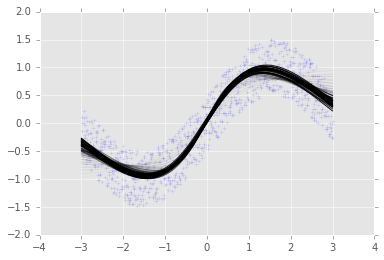

In [10]:
ops.reset_default_graph()
g  = tf.get_default_graph()

n_observations = 1000
xs             = np.linspace(-3, 3, n_observations)
ys             = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
xs             = xs.reshape(n_observations,1)
ys             = ys.reshape(n_observations,1)


X         = tf.placeholder(tf.float32, shape=[None,1],name='X')
Y         = tf.placeholder(tf.float32, shape=[None,1],name='Y')     

n_inputs  = 1
n_neurons = 10
h1        = linear(X,   n_inputs,   n_neurons, activation=tf.nn.tanh, scope='layer1')
h2        = linear(h1,  n_neurons,  n_neurons, activation=tf.nn.tanh, scope='layer2')
Y_pred    = linear(h2, n_neurons, 1, scope='layer3')

#Y_pred = linear(h2, 10,  1, scope='layer3')

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print 'Dimension of prediction vector is: ',sess.run(Y_pred, feed_dict={X: xs[0:111]}).shape


# And retrain w/ our new Y_pred
train(X, Y, Y_pred,n_iterations=500, batch_size=30, learning_rate=0.055)

In [ ]:
|